<a href="https://colab.research.google.com/github/hw1025/NLP_2023/blob/main/11_WordCloud_AesopFablesbyGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🐹 🐾 [Text Corpus <font size='1.8'>코퍼스/말뭉치</font>](https://en.wikipedia.org/wiki/Text_corpus)
- In linguistics, a corpus (plural corpora) or text corpus is a language resource consisting of a large and structured set of texts (nowadays usually electronically stored and processed). In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

- The **corpus-toolkit** package grew out of courses in corpus linguistics and learner corpus research. The toolkit attempts to balance simplicity of use, broad application, and scalability. Common corpus analyses such as the <font color = 'red'>_calculation of word and n-gram frequency and range, keyness, and collocation_</font> are included. In addition, more advanced analyses such as the identification of <font color = 'red'>_dependency bigrams (e.g., verb-direct object combinations) and their frequency, range, and strength of association_</font>  are also included.(https://pypi.org/project/corpus-toolkit/)

Some conditions should be fulfilled if you want to conduct corpus-related analysis.

>1. Read and write a file using an operating system package.
>2. 🆘 import the **[os](https://docs.python.org/3/library/os.html)** module.


>3. Text files you want to analyze (e.g., url(uniform resource locator) with html document, text files under the Files dicrectory of Google Colab).
>4. Text ➡️ Words: **Tokenization**
>5. Words with the conjugation, inflection, derivation process ↔️ Words sorted by grouping inflected or variant forms of the same word (i.e., **lemmatization**)
>6. POS (part of speech (e.g., word-grammatical category pairs))
>7. 🆘 Install **corpus-toolkit** and **nltk**(natural language tool kit) packages.



In [10]:
#@markdown 📌 Download the os module
import os

In [22]:
#@markdown 📌 Make a new working directory as "txtdata". 📎 <Module name: os> <function: mkdir>

os.mkdir("txtdata")

FileExistsError: ignored

In [ ]:
#@markdown 📌 Download the corpus-toolkit package
!pip install corpus-toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.8 MB/s eta 0:00:00


🆘 **curl**: Curl is a command-line tool for making HTTP requests. It can be used to download content from a URL.

"**curl** " + **url** + " > **txtdata.txt**": This part of the command is constructing a string that includes the URL (url) and specifies the output redirection to a file named "txtdata.txt". The > symbol is used for output redirection in the shell.

So, in simple terms, the os.system("curl " + url + " > txtdata.txt") line is downloading the content from the specified URL using the curl command and saving it to a file named "txtdata.txt".

In [13]:
from urllib.request import urlopen

#@markdown 📌 Open a txt file. <Use a set of duble quotation marks "" and assign the url address as the _url_ variable>
url="https://raw.githubusercontent.com/ms624atyale/Temp_Data/main/PG_Aesop_NoQuotesAllText.txt"
#When you copy and paste, i) go to the repository of your/someone else's github, ii) click on a txt file of your interest, iii) click on <raw> icon around at the top right hand corner, and iii) copy & paste the url staring with "https://raw.githubusercontent.com/..."


os.system("curl " + url + " > txtdata.txt") #This moves the whole text of the url to the txtdata folder.

file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close() #Close the file you have been working on.

#@markdown 📎 When you see txtdata.txt under the Files directory, move it under the txtdata folder you've created by drag & drop.

#### 🆘 **Drag your txtdata.txt file to the txtdata folder.**

In [14]:
#@markdown 📌 i) Tokenize your text and ii) Get frequency.

# Import the corpus_tools module from the corpus_toolkit library
from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
for token in tok_corp:
  print(token)

count = len(token)
print(count)

#💣💊You cannot get tokens by simply using print(tok_corp). You should use FOR Statement!

Processing PG_Aesop_NoQuotesAllText.txt (1 of 1 files)
['there', 'be', 'once', 'a', 'little', 'kid', 'whose', 'grow', 'horn', 'make', 'he', 'think', 'he', 'be', 'a', 'grown-up', 'billy', 'goat', 'and', 'able', 'to', 'take', 'care', 'of', 'himself', 'so', 'one', 'even', 'when', 'the', 'flock', 'start', 'home', 'from', 'the', 'pasture', 'and', 'he', 'mother', 'call', 'the', 'kid', 'pay', 'no', 'heed', 'and', 'keep', 'right', 'on', 'nibble', 'the', 'tender', 'grass', 'a', 'little', 'late', 'when', 'he', 'lift', 'he', 'head', 'the', 'flock', 'be', 'go', 'he', 'be', 'all', 'alone', 'the', 'sun', 'be', 'sink', 'long', 'shadow', 'come', 'creep', 'over', 'the', 'ground', 'a', 'chilly', 'little', 'wind', 'come', 'creep', 'with', 'they', 'make', 'scary', 'noise', 'in', 'the', 'grass', 'the', 'kid', 'shiver', 'a', 'he', 'think', 'of', 'the', 'terrible', 'wolf', 'then', 'he', 'start', 'wildly', 'over', 'the', 'field', 'bleat', 'for', 'he', 'mother', 'but', 'not', 'half-way', 'near', 'a', 'clump', 

In [15]:
#🆘 ct is an abbreviation for corpus-tools module.

mydata = ct.frequency(mydata)
#The frequency() function is being used to generate/create a frequency dictionary from the mydata corpus.

In [19]:
#@markdown 📌 Tagging (i.e., associating each token with a grammatical category (e.g., mountain - N) )
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing PG_Aesop_NoQuotesAllText.txt (1 of 1 files)


In [27]:
#@markdown 📌 Get frequency of your tagged tokens. 'hits=10' means you want to get the top 10 words.

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 20)

Processing 1.txt (1 of 1 files)
the_DET	1911
a_DET	832
be_AUX	831
and_CCONJ	775
he_PRON	761
to_PART	566
of_ADP	504
his_PRON	360
in_ADP	353
you_PRON	313
they_PRON	287
I_PRON	280
it_PRON	265
not_PART	256
to_ADP	228
have_AUX	221
with_ADP	204
but_CCONJ	193
for_ADP	183
at_ADP	174


## 💡 Now, let's save tagged data as a dataframe and get word clouds!

In [17]:
#@markdown 📌  Tagged data is in a dictionary format (e.g., {key:value}).
type(tagged_freq)

dict

In [18]:
#@markdown 📌 Import the pandas package so as to handle dataframe.

import pandas as pd

In [29]:
#@markdown 📌 Generate a dateframe with tagged words (e.g., word_POS) and their frequencies.

# Assuming 'tagged_freq' is a previously defined dictionary
data_dict = tagged_freq
# Get the items (key-value pairs) from the dictionary
data_items = data_dict.items()
# Convert the items to a list
data_list = list(data_items)
print(data_list)


[('there_PRON', 39), ('be_VERB', 32), ('once_ADV', 34), ('a_DET', 832), ('little_ADJ', 42), ('kid_NOUN', 4), ('whose_DET', 8), ('grow_VERB', 14), ('horn_NOUN', 20), ('make_VERB', 97), ('he_PRON', 761), ('think_VERB', 50), ('be_AUX', 831), ('grown_NOUN', 1), ('up_ADP', 102), ('Billy_PROPN', 1), ('Goat_PROPN', 19), ('and_CCONJ', 775), ('able_ADJ', 9), ('to_PART', 566), ('take_VERB', 58), ('care_NOUN', 12), ('of_ADP', 504), ('himself_PRON', 48), ('so_ADV', 141), ('one_NUM', 128), ('evening_NOUN', 14), ('when_SCONJ', 123), ('the_DET', 1911), ('flock_NOUN', 14), ('start_VERB', 9), ('home_ADV', 8), ('from_ADP', 83), ('pasture_NOUN', 11), ('his_PRON', 360), ('mother_NOUN', 11), ('call_VERB', 27), ('Kid_PROPN', 10), ('pay_VERB', 8), ('no_DET', 39), ('heed_NOUN', 1), ('keep_VERB', 33), ('right_ADV', 7), ('on_ADP', 133), ('nibble_VERB', 4), ('tender_ADJ', 5), ('grass_NOUN', 7), ('later_ADV', 9), ('lift_VERB', 3), ('head_NOUN', 42), ('go_VERB', 72), ('all_ADV', 19), ('alone_ADJ', 2), ('sun_NOUN',

In [30]:
#🆘  This code cell is part of the above code cell (#[12]). For an educational purpose, it is separated on purpose.

# Create a DataFrame from the list of items
df = pd.DataFrame(data_list)
# Rename the columns of the DataFrame
df.columns = ["Tagged","Freq"]
# Print the resulting DataFrame
print(df)

                Tagged  Freq
0           there_PRON    39
1              be_VERB    32
2             once_ADV    34
3                a_DET   832
4           little_ADJ    42
...                ...   ...
2995       circle_VERB     1
2996     boasting_NOUN     1
2997  chanticleer_NOUN     1
2998        rival_NOUN     1
2999       Pride_PROPN     1

[3000 rows x 2 columns]


## 💡 Splitting tagged columns into Words and POS <font size = '2.3'> part of speech (i.e., grammatical categories)
  - e.g.,
              column          column 1.    column2
          yesterday_ADP ➡️   yesterday       ADP
          rain_NOUN             rain         NOUN
          yellow_ADJ           yellow.       ADJ

In [31]:
#@markdown 📌 Codelines to get tagged columns split into words and POS
#🆘 df is an abbreviation for dataframe in Pandas. It is very frequently used.

# Extract 'Tagged' column from DataFrame
tagged = df["Tagged"]
# Initialize empty lists for 'pos' and 'word'
pos = []
word = []

# Loop through each element in 'tagged'
for i in range(0, len(tagged)):
  # Get the tagged word from the 'Tagged' column
  w = tagged[i]
  # Split the tagged word into word and POS using underscore as separator
  ws = w.split("_")
   # Append the word to the 'word' list
  word.append(ws[0])
  # Append the POS to the 'pos' list
  pos.append(ws[1])

# Print length of 'tagged', first 10 elements of 'word' and 'pos'
print(len(tagged))
print(word[:10])
print(pos[:10])

3000
['there', 'be', 'once', 'a', 'little', 'kid', 'whose', 'grow', 'horn', 'make']
['PRON', 'VERB', 'ADV', 'DET', 'ADJ', 'NOUN', 'DET', 'VERB', 'NOUN', 'VERB']


[✏️Gneral description for the following cell]: This code adds "POS" and "Word" columns to the DataFrame, rearranges the column order, sorts the DataFrame by "POS" and "Freq" in descending order, prints the total number of rows, and displays the first few rows of the sorted DataFrame.

In [32]:
#@markdown 📌 Add new columns to the dataframe.

# Add 'POS' and 'Word' columns to the DataFrame
df["POS"] = pos
df["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df = df[cols]

# Sort the DataFrame by 'POS' and 'Freq' in descending order
df = df.sort_values(by=['POS', 'Freq'], ascending = False)
# Print the total number of rows in the DataFrame
print("Total rows: ", len(df))
# Display the first few rows of the sorted DataFrame
df.head()

Total rows:  3000


,POS,Word,Freq
1615,X,nearer,1
2400,X,ass,1
88,VERB,say,158
402,VERB,have,122
184,VERB,see,112


##⛅  Creating wordclouds by POS
>1. Below, "wc" takes text, not list. So we make word-list-by-POS into a text using 'join'.
>2. In addition, the joined text should include words according to their frequency. (e.g., if "before" occurs 5 times, then the text should include "before before before before before".

[✏️Gneral description for the following cell]: This code filters the DataFrame to include only rows where the 'POS' is "VERB," converts the 'Freq' and 'Word' columns to lists, repeats words based on their frequencies using NumPy, joins the repeated words into a single string, and prints the results.

In [33]:
#@markdown 📌 Select POS = VERB

# Filter rows in the DataFrame where 'POS' is "VERB"
df1 = df[df["POS"] == "VERB"]
# Print the number of rows in the filtered DataFrame
print(len(df1))


# Convert 'Freq' and 'Word' columns to lists; # Print the number of elements in the 'freq1' list
freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

# Repeat words by frequency using NumPy
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

 # Print the length of the concatenated string 'txt2'
txt2 = ' '.join(y); print(len(txt2))
print(txt2)

690
690
690
20695
say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have 

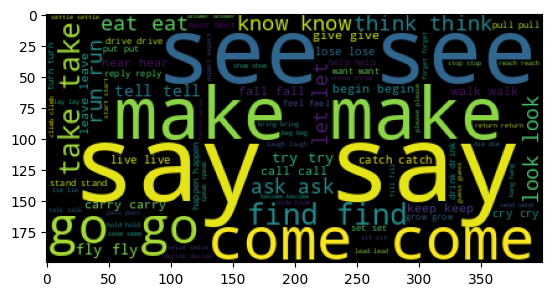

In [34]:
#@markdown 📌 High frequency POS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2))
plt.imshow(wc)


## ⛅ ⛅The following codes will provide you POS options such as NOUN, ADJ, ADV.

## 📎 Select POS you want.

690
       POS      Word  Freq
88    VERB       say   158
402   VERB      have   122
184   VERB       see   112
9     VERB      make    97
465   VERB       get    84
...    ...       ...   ...
2985  VERB      yard     1
2987  VERB   express     1
2989  VERB  approach     1
2990  VERB      shut     1
2995  VERB    circle     1

[690 rows x 3 columns]


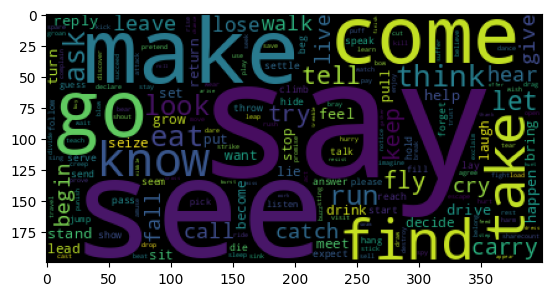

In [35]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

1169
       POS         Word  Freq
211   NOUN          day    74
451   NOUN         time    63
49    NOUN         head    42
80    NOUN          way    33
311   NOUN        water    32
...    ...          ...   ...
2986  NOUN      thicket     1
2992  NOUN         gain     1
2996  NOUN     boasting     1
2997  NOUN  chanticleer     1
2998  NOUN        rival     1

[1169 rows x 3 columns]


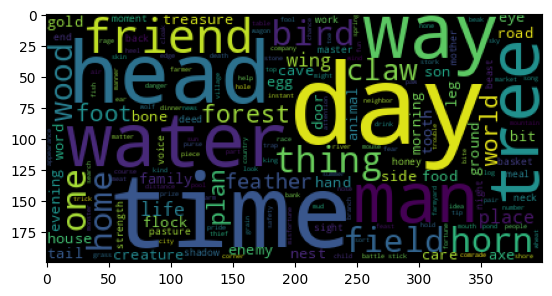

In [36]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

447
      POS        Word  Freq
299   ADJ        good    57
325   ADJ       great    53
4     ADJ      little    42
290   ADJ         old    36
191   ADJ       other    35
...   ...         ...   ...
2966  ADJ      brazen     1
2972  ADJ    restless     1
2977  ADJ  respectful     1
2980  ADJ    grandest     1
2988  ADJ       harsh     1

[447 rows x 3 columns]


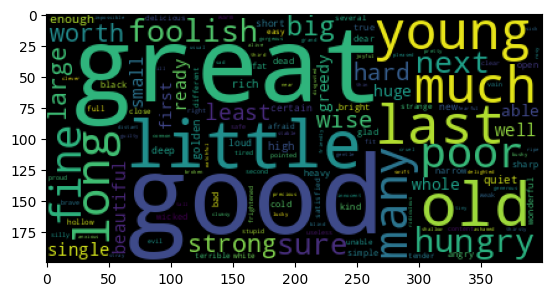

In [37]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

250
      POS        Word  Freq
199   ADV        very   147
24    ADV          so   141
72    ADV        then    70
239   ADV        away    61
317   ADV        soon    55
...   ...         ...   ...
2891  ADV   strangely     1
2892  ADV      softly     1
2926  ADV  pleasantly     1
2934  ADV   meaningly     1
2953  ADV     loosely     1

[250 rows x 3 columns]


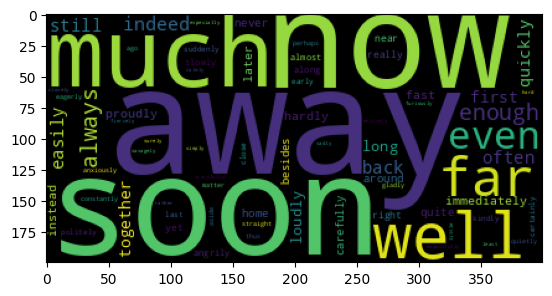

In [38]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

## ⛅ ⛅ I don't like the background in black. I want it WHITE!!! ⛄⚡


✏️ In natural language processing, stop words are commonly used words (e.g., "the," "and," "is") that are often filtered out because they don't contribute much to the meaning of a text. Here's an example list of English stop words:

stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",'wouldn', "wouldn't"
]

You can customize or extend this list based on your specific needs and the requirements of your natural language processing task. Keep in mind that the appropriateness of stop words may vary depending on the specific context and analysis you are conducting.

In [ ]:
#@markdown 📌 Exclude short words from your word cloud.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

🐹🐾"**#@param**" is a special syntax used in Colab notebooks to **create interactive forms**, allowing users to input values interactively. In this case, pos = "VERB" #@param ["VERB","NOUN","ADJ","ADV"] is providing a dropdown menu for the user to choose a part of speech (POS) from the options "VERB," "NOUN," "ADJ," or "ADV."

When the user selects a value from the dropdown menu, the variable pos is assigned that chosen value. This allows the user to dynamically change the part of speech and observe the corresponding word cloud based on the selected POS. It's a useful feature in Colab notebooks for creating interactive and customizable code snippets.

690


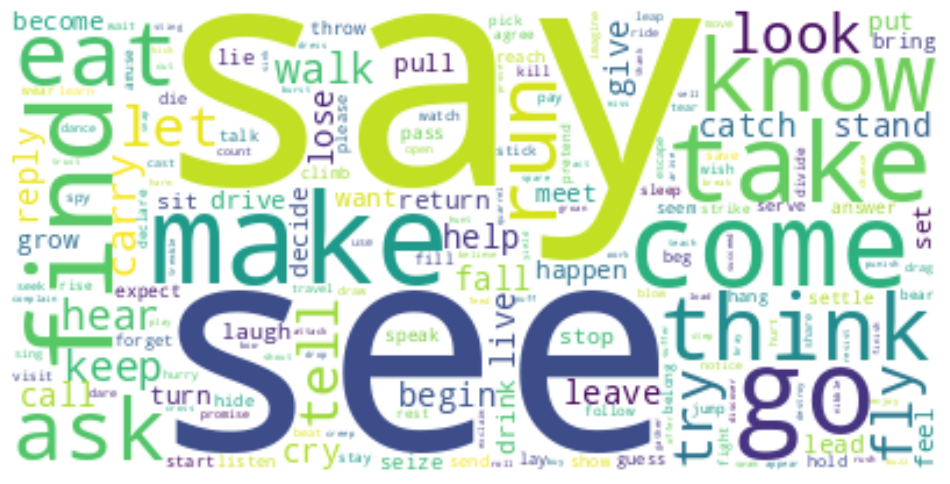

In [ ]:
#@markdown 📌 Wordcloud by POS:

#"#@param" is a special syntax used in Colab notebooks to create interactive forms.
pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
# Filter DataFrame to include only rows where 'POS' is equal to the chosen part of speech
df1 = df[df["POS"] == pos]
# Print the number of rows in the filtered DataFrame
print(len(df1))


# Convert 'Freq' and 'Word' columns to lists
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by frequency using NumPy
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))

# Plot the word cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# Save the word cloud as an image file
wordcloud.to_file('wordcloud_title.png')


1169


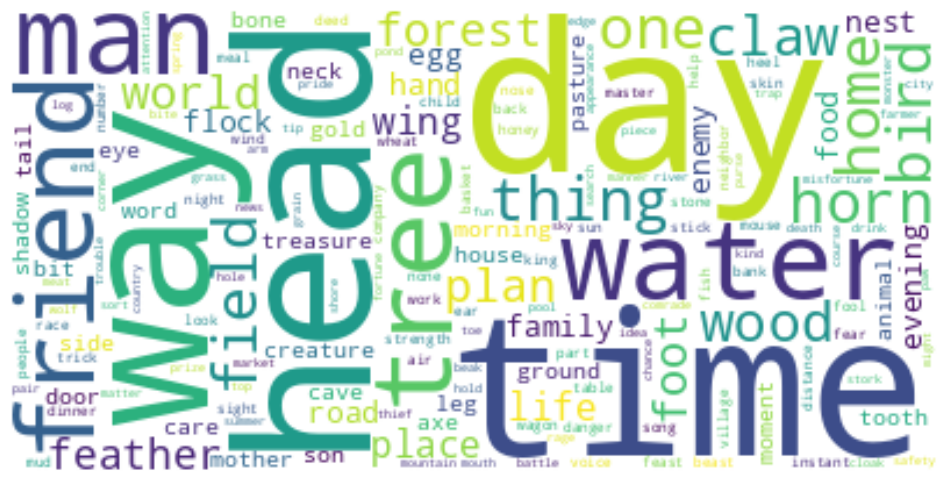

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file('wordcloud_title.png')

447


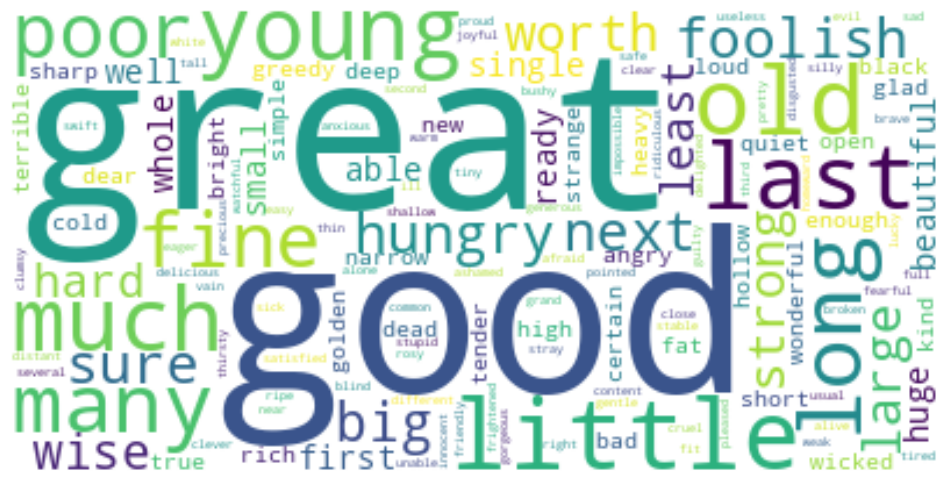

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file('wordcloud_title.png')

250


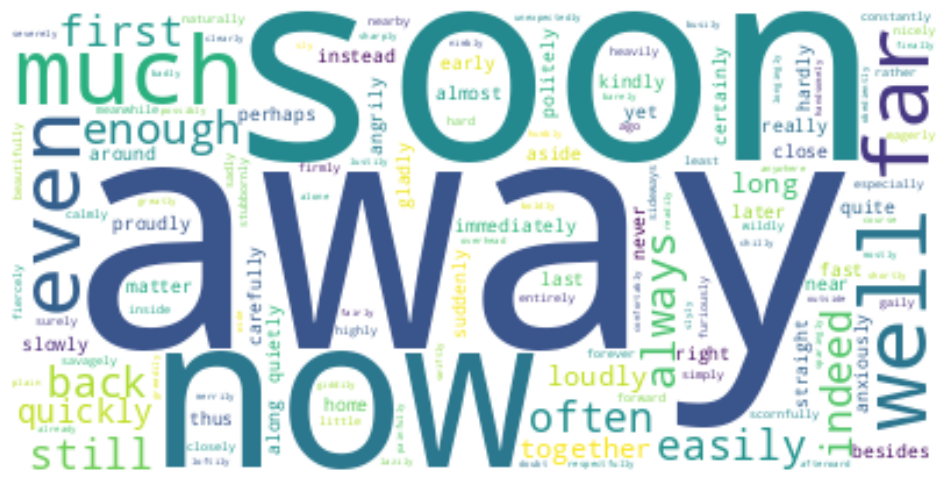

In [ ]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file('wordcloud_title.png')